# [Lab Session 2](otsu.ipynb)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

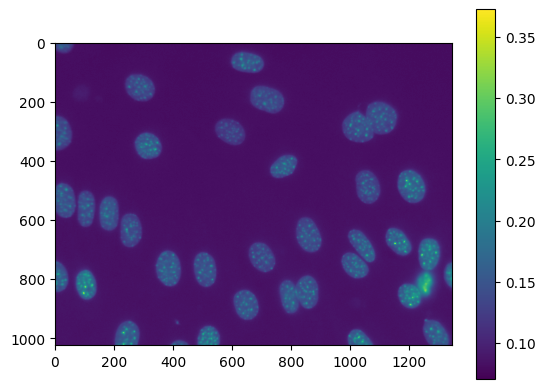

In [29]:
img=plt.imread('data/NIH3T3/im/dna-0.png')
plt.imshow(img)
plt.colorbar()

**[Task 1.2.]()** Quantify the image into 256 bins:

In [30]:
img8=(img*255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [31]:
bins=np.zeros(256, dtype=int)

x=0
for x,j in np.ndindex((img8.shape[0]),(img8.shape[1])):
    x=img8[x,j]
    bins[x]=bins[x]+1
#print(bins)
h=bins





Show the computed histogram:

<BarContainer object of 256 artists>

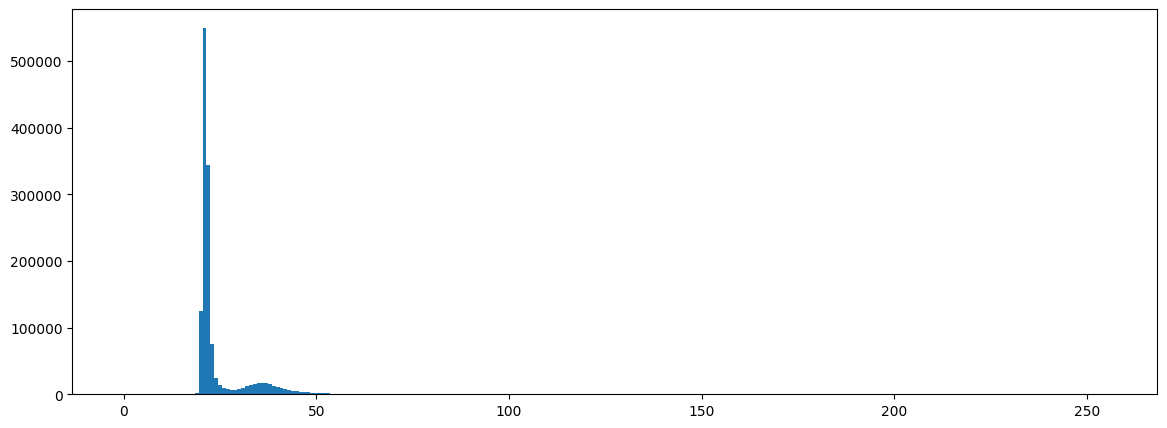

In [32]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [33]:
def otsu (img):
    print(img.min(), img.max())
    wcv_list=[]
    for i in range(len(img)):
        pixels_left=0
        pixels_right=0
        var_left=0
        var_right=0
        mean_left=0
        mean_right=0
        #x=0
        for x in range(i):
            pixels_left += img[x]
            #print(pixels_left)
        #npixels_left=pixels_left
        for x in range(i):
            mean_left+=img[x]*x/(pixels_left+1e-8)
        
        #print(mean_left)
        for x in range(i,256):
            pixels_right += img[x]
        npixels_right=pixels_right
        for x in range(i,256):
            mean_right=img[i]*i/(pixels_right+1e-8)

        for x in range(i):
            var_left += (1/(pixels_left+1e-8))*((x-mean_left)**2)*img[x]
        bcv_left=var_left
        #print(bcv_left)
        for x in range(i,256):
            var_right +=(1/(npixels_right+1e-8))*(x-mean_right)**2*img[x]
        bcv_right=var_right
        #print(bcv_right)


        wcv= pixels_left*var_left+npixels_right*var_right
        wcv_list[i]=wcv_list.append(wcv)
    t=min(wcv_list)

        
#print(bins)
otsu(bins)

0 550322


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
def otsu_gut (img):
    pen= np.zeros(256)
    for i in range(0,256):
        g_klein = bins[0:i]
        g_groß = bins[i:256]
        g_k=g_klein.sum()
        g_g=g_groß.sum()
        sigma1=np.var(img8[img8<i])
        sigma2=np.var(img8[img8>=i])
        pen[i]=g_k*sigma1+g_g*sigma2

    pen1=pen[~np.isnan(pen)]
    min_pen=min(pen1)
    #print(min_pen)
    minim=np.where(pen == min_pen)[0][0]
    return(minim)

**[Task 1.5.]()** Perform Otsu thresholding:

In [ ]:
thershold=otsu_gut(img8)
print(thershold)

/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


11275653.93934225
31


**[Task 1.6.]()** Compute the Dice coefficient:

0.8943783223933183


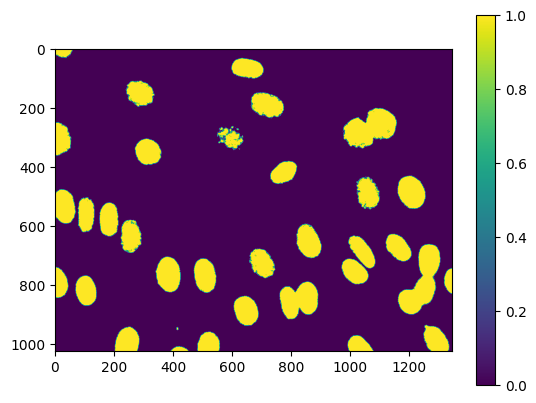

In [36]:
gt=plt.imread('data/NIH3T3/gt/0.png')

img=plt.imread('data/NIH3T3/im/dna-0.png')

otsu_img=(img8>=31)

plt.imshow(otsu_img)
plt.colorbar()

dice= 2*np.sum(otsu_img*gt)/(otsu_img.sum()+gt.sum())
print(dice)